# Simulationsvorbereitungen
##### Import der notwendigen Bibliotheken

In [177]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import time

##### Materialeigenschaften 

In [178]:
mat1 = 'Silber'
material = {'PET': [0.24, 1.38, 1.5], 'Silber': [429, 10.49, 0.235]} # lambda, Dichte, spez.Wärmekapazität
mat = material[mat1]
a = mat[0] /(mat[1]*mat[2]*10**4)

##### Geometrie und Diskretisierung

In [179]:
stab_x = 1 # [cm]
stab_y = 1 # [cm]
Zeitraum = 1 # [Sekunden]
dx = 0.01
dy = 0.01
dt = 0.0014

##### Berechnung der Konstanten + Stabilität

In [180]:
C1 = a*dt/(dx**2)
C2 = a*dt/(dy**2)

stability = dt*a/(dx**2)

print('Stabilitätskriterium: {}'.format(stability))

Stabilitätskriterium: 0.24363628988094027


##### Start- und Nebenbedingungen
Festlegen des Datentyps mit dem gerechnet wird

In [181]:
T = np.zeros(shape=(int(stab_y/dy), int(stab_x/dx), int(Zeitraum/dt)), dtype=np.float64)

T[:,:,:] = 20
T[40:60,0,:] = 100
print(T.shape)
print(T.size)

(100, 100, 714)
7140000


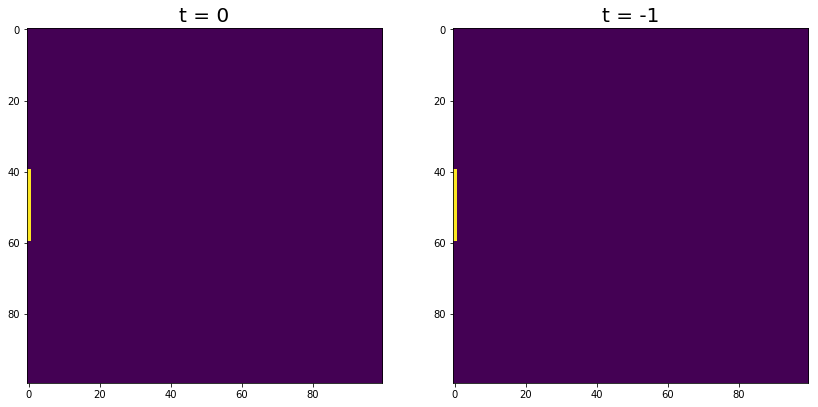

In [182]:
plt.figure(figsize=(14,10))
# erster plot
plt.subplot(1,2,1)
plt.imshow(T[:,:,0])
plt.title('t = 0', fontsize=20)
# zweiter plot
plt.subplot(1,2,2)
plt.imshow(T[:,:,-1])
plt.title('t = -1', fontsize=20)
plt.show()

# Solver
##### Funktion zur Berechnung der Temperaturen

In [183]:
def calc_T(T,C1,C2):
    for n in range(1,len(T[0,0,:])-1):
        for j in range(1,len(T[0,:,0])-1):
            for i in range(1,len(T[:,0,0])-1):
                T[i,j,n+1] = C1*(T[i+1,j,n]-2*T[i,j,n]+T[i-1,j,n]) + C2*(T[i,j+1,n]-2*T[i,j,n]+T[i,j-1,n]) + T[i,j,n]
    return T

##### Berechnung

In [184]:
start = time.time()
T = calc_T(T, C1, C2)
print('Time = {:.2f} Sekunden'.format(time.time()-start))

Time = 13.90 Sekunden


##### Numba zur Steigerung der Geschwindigkeit

In [185]:
from numba import jit
@jit(nopython=True)
def calc_T(T,C1,C2):
    for n in range(1,len(T[0,0,:])-1):
        for j in range(1,len(T[0,:,0])-1):
            for i in range(1,len(T[:,0,0])-1):
                T[i,j,n+1] = C1*(T[i+1,j,n]-2*T[i,j,n]+T[i-1,j,n]) + C2*(T[i,j+1,n]-2*T[i,j,n]+T[i,j-1,n]) + T[i,j,n]
    return T

##### Berechnung

In [186]:
start = time.time()
T = calc_T(T, C1, C2)
print('Time = {:.2f} Sekunden'.format(time.time()-start))

Time = 0.26 Sekunden


# Visualisierung der Ergebnisse

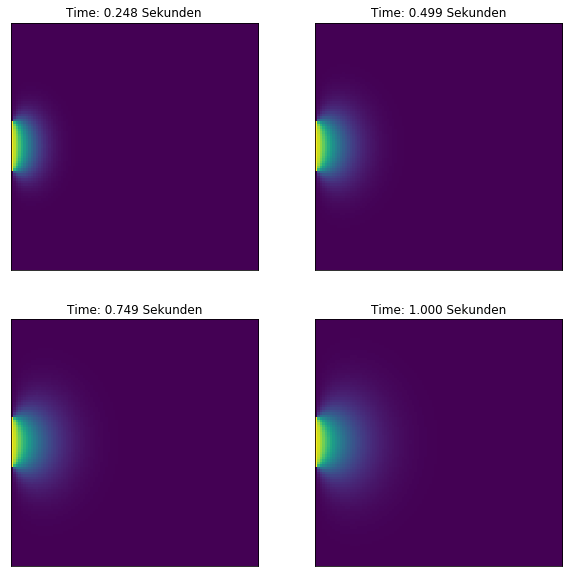

In [187]:
plt.figure(figsize=(10,10))
n_imgs = 4
for count in range(1,n_imgs+1):
    plt.subplot(2,2,count)
    number = int(count/n_imgs*len(T[0,0,:]))-1 
    plt.imshow(T[:,:,number])
    plt.title('Time: {:.3f} Sekunden'.format(number/(len(T[0,0,:])-1)*Zeitraum))
    plt.xticks([])
    plt.yticks([])
plt.show()

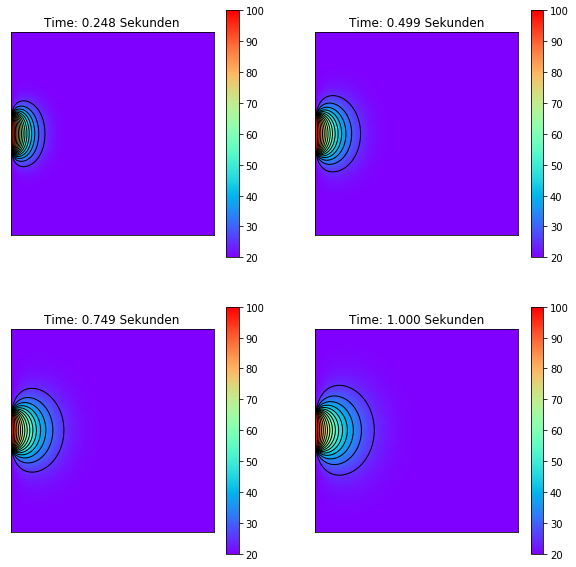

In [188]:
#%% Zusatz mit Contours
x = np.arange(0, int(stab_x/dx), 1) #+++++++++++++++++++++++++++++++
y = np.arange(0, int(stab_y/dy), 1) #+++++++++++++++++++++++++++++++
X, Y = np.meshgrid(x, y) #+++++++++++++++++++++++++++++++
levels = np.arange(20,100,5) #+++++++++++++++++++++++++++++++

plt.figure(figsize=(10,10))
n_imgs = 4
for count in range(1,n_imgs+1):
    plt.subplot(2,2,count)
    number = int(count/n_imgs*len(T[0,0,:]))-1
    plt.imshow(T[:,:,number], cmap='rainbow')
    
    plt.colorbar() #+++++++++++++++++++++++++++++++
    plt.contour(X,Y,T[:,:,number], levels, linewidths=1, colors='k') #+++++++++++++++++++++++++++++++
    
    plt.title('Time: {:.3f} Sekunden'.format(number/(len(T[0,0,:])-1)*Zeitraum))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Randbedingungen
##### Dirichlet 

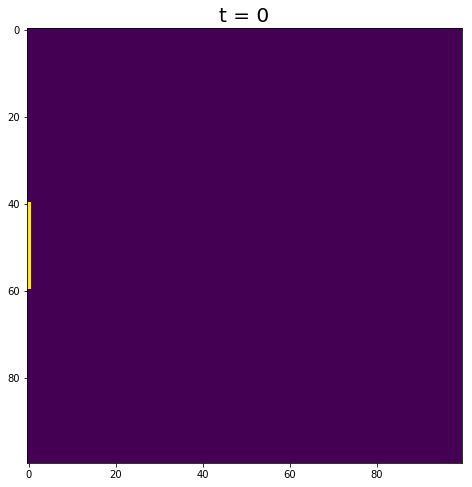

In [189]:
plt.figure(figsize=(10,8))
# erster plot
# plt.subplot(1,2,1)
plt.imshow(T[:,:,0])
plt.title('t = 0', fontsize=20)
# # zweiter plot
# plt.subplot(1,2,2)
# plt.imshow(T[:,:,-1])
# plt.title('t = -1', fontsize=20)
plt.show()

In [190]:
stab_x = 1 # [cm]
stab_y = 1 # [cm]
Zeitraum = 200 # [Sekunden] #################### Zeitraum erhöht ################
dx = 0.01
dy = 0.01
dt = 0.0014

T = np.zeros(shape=(int(stab_y/dy), int(stab_x/dx), int(Zeitraum/dt)), dtype=np.float64)

T[:,:,:] = 20
T[40:60,0,:] = 100

start = time.time()
T = calc_T(T, C1, C2)
print('Time = {:.2f}'.format(time.time()-start))

Time = 29.07


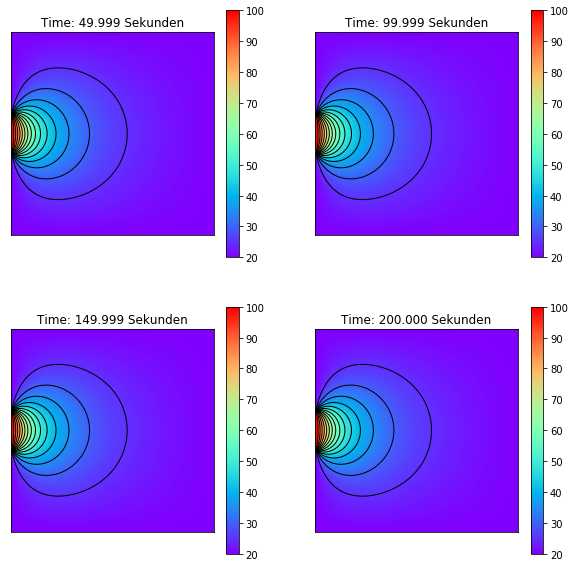

In [191]:
#%% Zusatz mit Contours
x = np.arange(0, int(stab_x/dx), 1)
y = np.arange(0, int(stab_y/dy), 1)
X, Y = np.meshgrid(x, y)
levels = np.arange(20,100,5)

plt.figure(figsize=(10,10))
n_imgs = 4
for count in range(1,n_imgs+1):
    plt.subplot(2,2,count)
    number = int(count/n_imgs*len(T[0,0,:]))-1
    plt.imshow(T[:,:,number], cmap='rainbow')
    
    plt.colorbar()
    plt.contour(X,Y,T[:,:,number], levels, linewidths=1, colors='k')
    
    plt.title('Time: {:.3f} Sekunden'.format(number/(len(T[0,0,:])-1)*Zeitraum))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### Neumann

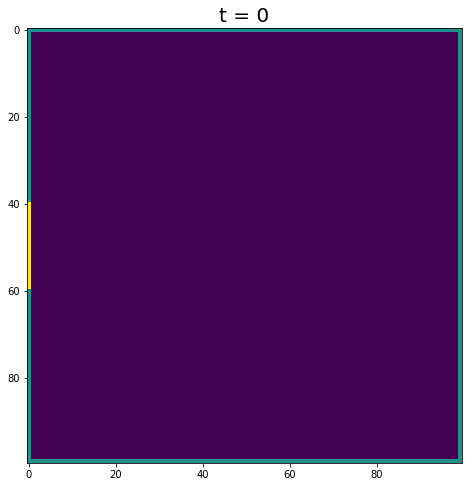

In [192]:
plt.figure(figsize=(10,8))
img = np.zeros((100,100))
img[40:60,0] = 100
img[:,-1] = 50
img[0,:] = 50
img[-1,:] = 50
img[0:40,0] = 50
img[60:,0] = 50
plt.imshow(img)
plt.title('t = 0', fontsize=20)
plt.show()

In [193]:
stab_x = 1 # [cm]
stab_y = 1 # [cm]
Zeitraum = 20 # [Sekunden]
dx = 0.01
dy = 0.01
dt = 0.0014

T = np.zeros(shape=(int(stab_y/dy), int(stab_x/dx), int(Zeitraum/dt)), dtype=np.float64)

T[:,:,:] = 20
T[40:60,0,:] = 100

In [194]:
@jit(nopython=True)
def calc_T(T,C1,C2, const): ####################### const = Cp*dt ##############
    for n in range(1,len(T[0,0,:])-1):
        for j in range(1,len(T[0,:,0])-1):
            for i in range(1,len(T[:,0,0])-1):
                T[i,j,n+1] = C1*(T[i+1,j,n]-2*T[i,j,n]+T[i-1,j,n]) + C2*(T[i,j+1,n]-2*T[i,j,n]+T[i,j-1,n]) + T[i,j,n]
        
        T[:,-1,n+1] = const + T[:,-2,n+1] ############### Berechnung der Neumann Randbedingung #############
        T[0,:,n+1] = const + T[1,:,n+1]
        T[-1,:,n+1] = const + T[-2,:,n+1]
        T[:40,0,n+1] = const + T[:40,1,n+1]
        T[60:,0,n+1] = const + T[60:,1,n+1]
    return T

##### Cp = 0

In [195]:
start = time.time()
T = calc_T(T, C1, C2, 0) ######### const = Cp*dt = 0*dt = 0 ############
print('Time = {:.2f}'.format(time.time()-start))

Time = 3.97


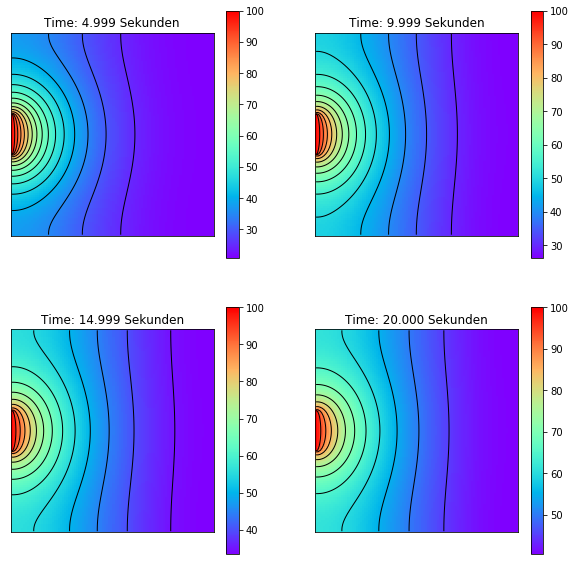

In [196]:
#%% Zusatz mit Contours
x = np.arange(0, int(stab_x/dx), 1)
y = np.arange(0, int(stab_y/dy), 1)
X, Y = np.meshgrid(x, y)
levels = np.arange(20,100,5)

plt.figure(figsize=(10,10))
n_imgs = 4
for count in range(1,n_imgs+1):
    plt.subplot(2,2,count)
    number = int(count/n_imgs*len(T[0,0,:]))-1
    plt.imshow(T[:,:,number], cmap='rainbow')
    
    plt.colorbar()
    plt.contour(X,Y,T[:,:,number], levels, linewidths=1, colors='k')
    
    plt.title('Time: {:.3f} Sekunden'.format(number/(len(T[0,0,:])-1)*Zeitraum))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### Cp < 0 

In [197]:
stab_x = 1 # [cm]
stab_y = 1 # [cm]
Zeitraum = 20 # [Sekunden]
dx = 0.01
dy = 0.01
dt = 0.0014

T = np.zeros(shape=(int(stab_y/dy), int(stab_x/dx), int(Zeitraum/dt)), dtype=np.float64)

T[:,:,:] = 20
T[40:60,0,:] = 100

In [198]:
start = time.time()
T = calc_T(T, C1, C2, -0.25) ######### const = Cp*dt = negativ*dt = -0,25 ############
print('Time = {:.2f}'.format(time.time()-start))

Time = 4.07


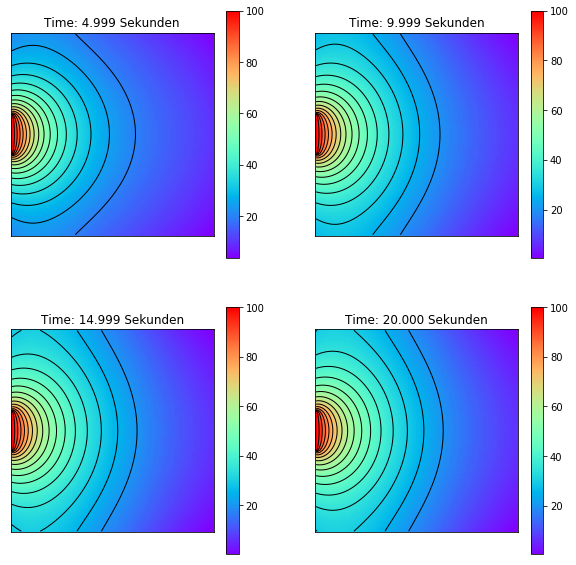

In [199]:
#%% Zusatz mit Contours
x = np.arange(0, int(stab_x/dx), 1)
y = np.arange(0, int(stab_y/dy), 1)
X, Y = np.meshgrid(x, y)
levels = np.arange(20,100,5)

plt.figure(figsize=(10,10))
n_imgs = 4
for count in range(1,n_imgs+1):
    plt.subplot(2,2,count)
    number = int(count/n_imgs*len(T[0,0,:]))-1
    plt.imshow(T[:,:,number], cmap='rainbow')
    
    plt.colorbar()
    plt.contour(X,Y,T[:,:,number], levels, linewidths=1, colors='k')
    
    plt.title('Time: {:.3f} Sekunden'.format(number/(len(T[0,0,:])-1)*Zeitraum))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### Cp > 0 

In [200]:
stab_x = 1 # [cm]
stab_y = 1 # [cm]
Zeitraum = 20 # [Sekunden]
dx = 0.01
dy = 0.01
dt = 0.0014

T = np.zeros(shape=(int(stab_y/dy), int(stab_x/dx), int(Zeitraum/dt)), dtype=np.float64)

T[:,:,:] = 20
T[40:60,0,:] = 100

In [201]:
start = time.time()
T = calc_T(T, C1, C2, +0.25) ######### const = Cp*dt = positiv*dt = +0,25 ############
print('Time = {:.2f}'.format(time.time()-start))

Time = 3.20


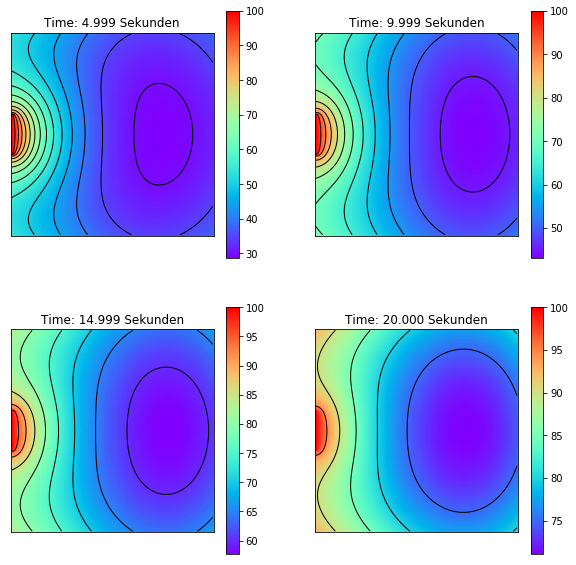

In [202]:
#%% Zusatz mit Contours
x = np.arange(0, int(stab_x/dx), 1)
y = np.arange(0, int(stab_y/dy), 1)
X, Y = np.meshgrid(x, y)
levels = np.arange(20,100,5)

plt.figure(figsize=(10,10))
n_imgs = 4
for count in range(1,n_imgs+1):
    plt.subplot(2,2,count)
    number = int(count/n_imgs*len(T[0,0,:]))-1
    plt.imshow(T[:,:,number], cmap='rainbow')
    
    plt.colorbar()
    plt.contour(X,Y,T[:,:,number], levels, linewidths=1, colors='k')
    
    plt.title('Time: {:.3f} Sekunden'.format(number/(len(T[0,0,:])-1)*Zeitraum))
    plt.xticks([])
    plt.yticks([])
plt.show()